# KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

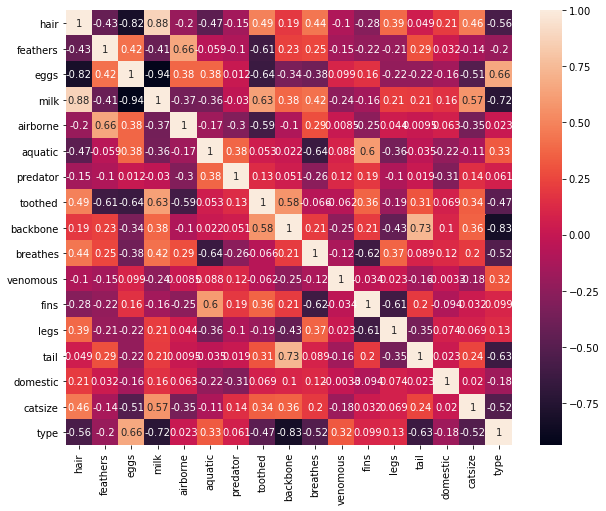

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True);

In [7]:
df.corr()['type'].sort_values()

backbone   -0.828845
milk       -0.723683
tail       -0.631830
hair       -0.562384
catsize    -0.521030
breathes   -0.519308
toothed    -0.471527
feathers   -0.197520
domestic   -0.181043
airborne    0.022677
predator    0.061179
fins        0.099430
legs        0.131693
venomous    0.321476
aquatic     0.326639
eggs        0.661825
type        1.000000
Name: type, dtype: float64

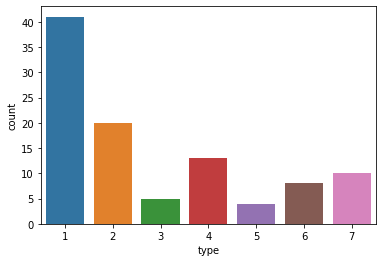

In [8]:
sns.countplot(x='type',data=df);

In [9]:
# Train test split
X = df.drop(columns=['type','animal name'])
y = df['type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Create a pipeline of scaler and knn model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler',scaler),('knn',model)])

In [11]:
# Grid search for best performing parameters

k_values = list(np.arange(1,21))

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid= {'knn__n_neighbors':k_values}, scoring='accuracy',cv=5)

grid.fit(X_train,y_train)

C:\Users\priya\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='accuracy')

In [12]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

In [13]:
accuracy = grid.cv_results_['mean_test_score']

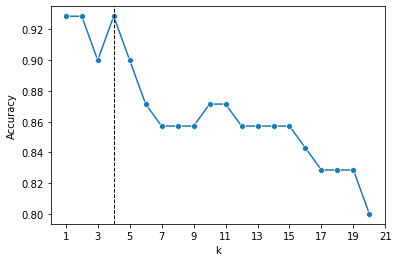

In [15]:
sns.lineplot(x=k_values,y=accuracy,marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.axvline(x=4,color='black',ls='--',lw=1)
plt.xticks(np.arange(1,22,2));

C:\Users\priya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



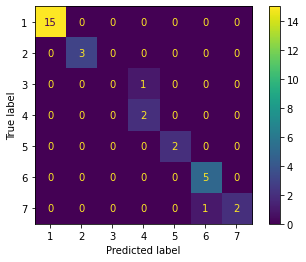

In [16]:
# Final model evaluation

from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_test,grid.predict(X_test)))
plot_confusion_matrix(grid,X_test,y_test);

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       0.95      1.00      0.98        20
           3       0.60      0.60      0.60         5
           4       0.93      1.00      0.96        13
           5       1.00      0.50      0.67         4
           6       0.73      1.00      0.84         8
           7       1.00      0.70      0.82        10

    accuracy                           0.93       101
   macro avg       0.89      0.83      0.84       101
weighted avg       0.94      0.93      0.93       101



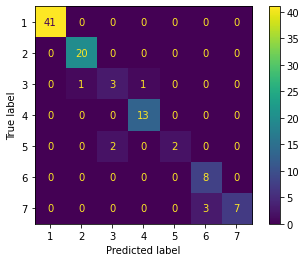

In [18]:
print(classification_report(y,grid.predict(X)))
plot_confusion_matrix(grid,X,y);

# Thank you!